In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
np.set_printoptions(linewidth=1000)

In [9]:
y_train_full[0]  # 5

5

In [10]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [11]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [12]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
X_test = X_test / 255.

In [14]:
y_train[0]  # 7

7

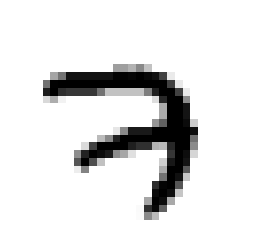

In [15]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [16]:
X_valid.shape

(5000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

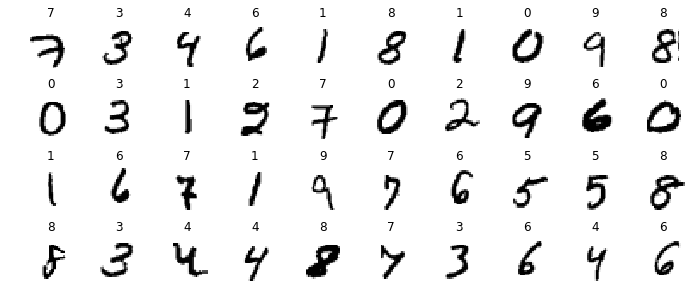

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):  # 0, 1, 2, 3
    for col in range(n_cols):  # 0, 1, 2, 3. 4, 5, 6, 7, 8, 9
        index = n_cols * row + col  # 10 * 0 + 0
        plt.subplot(n_rows, n_cols, index + 1)  # 4, 10, 1
        plt.imshow(X_train[index], cmap='binary')
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [19]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs['loss'])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [20]:
expon_lr = ExponentialLearningRate(factor=1.005)

In [21]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [23]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['accuracy'])

In [24]:
%%time
hist = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid),
                callbacks=[expon_lr])

Train on 55000 samples, validate on 5000 samples
55000/55000 [==============================] - 8s 154us/sample - loss: nan - accuracy: 0.5834 - val_loss: nan - val_accuracy: 0.0958
Wall time: 8.62 s


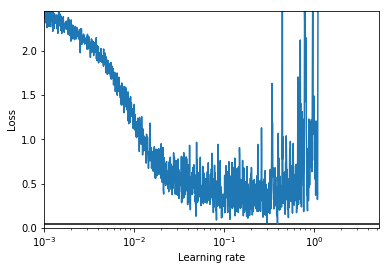

In [25]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel('Loss')
plt.show()

In [26]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [28]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(lr=2e-1),
             metrics=['accuracy'])

In [29]:
import os
run_index = 1
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [30]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)

In [31]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)

In [32]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [33]:
%%time
hist = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 8s 149us/sample - loss: 0.2363 - accuracy: 0.9277 - val_loss: 0.1144 - val_accuracy: 0.9656
Epoch 2/100
55000/55000 [==============================] - 7s 136us/sample - loss: 0.0957 - accuracy: 0.9701 - val_loss: 0.0821 - val_accuracy: 0.9756
Epoch 3/100
55000/55000 [==============================] - 7s 134us/sample - loss: 0.0644 - accuracy: 0.9799 - val_loss: 0.0807 - val_accuracy: 0.9764
Epoch 4/100
55000/55000 [==============================] - 7s 135us/sample - loss: 0.0461 - accuracy: 0.9847 - val_loss: 0.0866 - val_accuracy: 0.9768
Epoch 5/100
55000/55000 [==============================] - 7s 135us/sample - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.3449 - val_accuracy: 0.9216
Epoch 6/100
55000/55000 [==============================] - 7s 136us/sample - loss: 0.0238 - accuracy: 0.9922 - val_loss: 0.0740 - val_accuracy: 0.9808
Epoch 7/100
55000/55000 [====================

In [34]:
model = keras.models.load_model("my_mnist_model.h5")

In [35]:
model.evaluate(X_test, y_test)
# [0.07828208532569661, 0.9797], [loss, test accuracy], 97.97% 정확도

10000/10000 [==============================] - 1s 94us/sample - loss: 0.0783 - accuracy: 0.9797


[0.07828208532569661, 0.9797]

In [36]:
# [ tensorboard 사용하기 ]
# 시작 > Anaconda3(64bit) > Anaconda Prompt(tf2) > cd study_ai > 
# tensorboard --logdir=./my_mnist_logs --port=6006
# 웹 브라우저 : http://localhost:6006/